# 🧠 Tarea Semana 2: Optimización de hiperparámetros de Redes Neuronales

**Integrantes:**
* Adrián Bedón
* Jairo Bedón
* Andrea Cobos
* Xavier Ramos

Este notebook está diseñado para resolver un problema supervisado (regresión) utilizando un modelo de red neuronal `MLPRegressor`, y aplicar optimización de hiperparámetros (grid search) con validación cruzada (10 folds).


## 📝 Instrucciones

1. **Carga del conjunto de datos**
   Utiliza el conjunto de datos **Breast Cancer Wisconsin** disponible en el siguiente enlace:
   [https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast\_cancer.csv](https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv)

2. **Preprocesamiento básico**

   * Verifica los tipos de datos.
   * Estándariza las variables numéricas si es necesario.
   * Divide el conjunto en entrenamiento y prueba (por ejemplo, 80%/20%).

3. **Diseña un modelo de red neuronal (MLPClassifier)** y **Optimiza los hiperparámetros**

   * Utiliza `scikit-learn` y usa `GridSearchCV` con validación cruzada de **10 folds** para encontrar la mejor combinación de hiperparámetros (`activation`, `hidden_layer_sizes`, etc.).

4. **Entrenamiento y evaluación del modelo**

   * Entrena el modelo óptimo con el conjunto de hiperparámetros del mejor modelo.
   * Evalúalo para los 10 folds.

5. **Métricas de desempeño en un conjunto de prueba**

   * Calcula y visualiza la **matriz de confusión**.
   * Reporta las métricas: **precisión (accuracy)**, **recall**, **F1-score**.
   * Utiliza `classification_report` y `confusion_matrix` de `sklearn`.

6. **Análisis de resultados**

   * Comenta brevemente los resultados obtenidos.
   * ¿Qué observas sobre el desempeño del modelo? ¿Qué métricas destacan?


### ⏰ Tiempo estimado para completar la actividad: 2 horas

## 🧠 **Opción 1: Low Code — Clasificación con MLPClassifier y Optimización de hiperparámetros**

En esta tarea trabajarás con un conjunto de datos de cáncer de mama y aplicarás una red neuronal multicapa (**MLPClassifier**) usando un **pipeline**, con búsqueda de los mejores hiperparámetros mediante validación cruzada.

Solo necesitarás modificar algunas partes específicas del código indicadas con `# 👈 CAMBIA AQUÍ`.

### 📌 1. Cargar los datos y explorar la variable objetivo

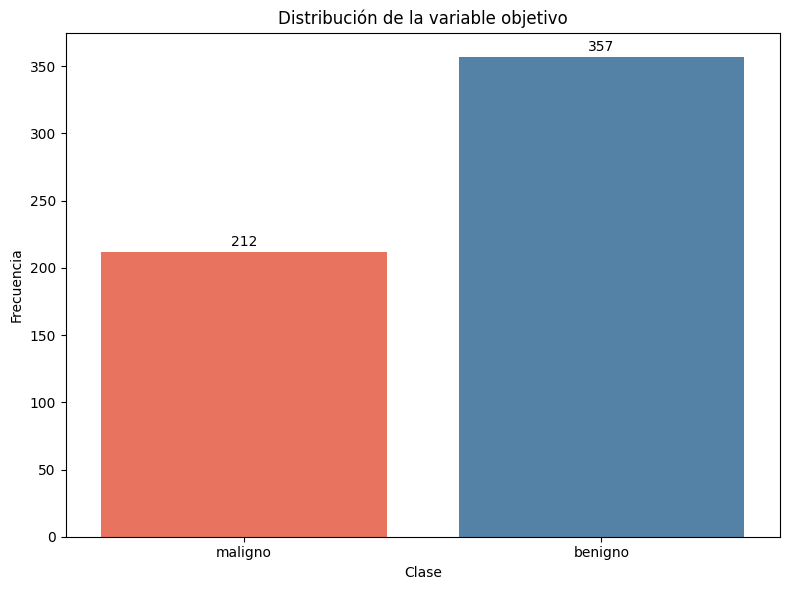

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde GitHub
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv")

# Visualizar la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x="target",   # 👈 CAMBIA AQUÍ si tu variable objetivo tiene otro nombre
    hue="target",
    palette={'maligno': 'tomato', 'benigno': 'steelblue'}
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()

Cuando analizamos el set de datos, podemos observar que tiene una agrupación de 10 variables con 3 atributos por cada una de ellas mean, error y worst. Como dato adicional la variable objetivo en el archivo se llama **target**.

Cuando vemos la distribución del set de datos vemos que los datos etiquetados como **benigno** tienen un ***62.74%*** del total de los datos, lo cual podía provocar un sobreajuste en el modelo para **benigno**.

### 🧪 2. Separar conjunto de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# Separar variables predictoras y objetivo
X = df.drop(columns='target')  # 👈 CAMBIA AQUÍ si tu variable objetivo tiene otro nombre
y = df['target']

# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

Probamos la red neuronal con distintas combinaciones de separación del set de datos, dando los mejores resultados la separación ***70-30***.

### ⚙️ 3. Pipeline y optimización con validación cruzada

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Crear pipeline: escalador + red neuronal
pipe = make_pipeline(
    StandardScaler(),
    MLPClassifier(max_iter=1000, random_state=42)
)

# Definir hiperparámetros a probar
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,100), (100,200), (200,50), (64, 32, 16, 8)],  # 👈 CAMBIA AQUÍ las neuronas en la capa oculta, 50,100,200
    'mlpclassifier__activation': ['relu','tanh', 'logistic'],  # 👈 CAMBIA AQUÍ la activation function, puedes probar 'relu', 'tanh'
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01]  # 👈 Regularización L2
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Buscar los mejores parámetros
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)  # 👈 CAMBIA AQUÍ X_train, y_train

# Mostrar el mejor modelo
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (200, 50)}


Se probó realizar un balanceo de la población por medio del uso de **SMOTE**, sin embargo, eso no mejoro el recall de **maligno** que era el objetivo esperado, en base a ello podemos inferir qué, si bien la clase mayorista es la de benignos, el bias que ESTA genera no está teniendo un gran impacto al momento de realizar la predicción.

Probamos también con varias arquitecturas de redes neuronales, obteniendo como la mejor arquitectura para usar en este problema: **dos capas ocultas cada una con 200 y 50 neuronas respectivamente.**

1. **Validación cruzada de 10 folds** usando `cross_val_score` sobre el **mejor modelo encontrado**.
2. **Visualización con boxplot** de las métricas.
3. **Tabla de métricas promedio y desviación estándar**.

### 📊 4. Evaluación con validación cruzada y visualización de métricas


Resumen de métricas con validación cruzada (10 folds):
                     mean       std
accuracy         0.979808  0.016107
precision_macro  0.982354  0.013705
recall_macro     0.975286  0.022118
f1_macro         0.978018  0.017888


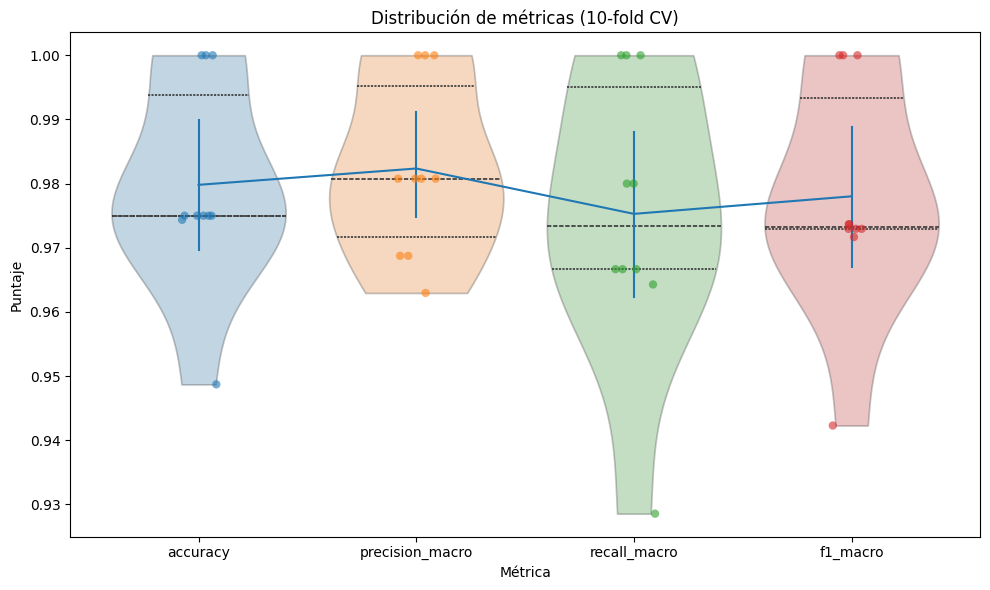

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extraer el mejor modelo del GridSearchCV
best_model = grid.best_estimator_

# Validación cruzada con 10 folds para distintas métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_scores = {}

for metric in scoring:
    scores = cross_val_score(best_model, X_train, y_train,  # 👈 CAMBIA AQUÍ X_train, y_train
                             cv=10, scoring=metric, n_jobs=-1)
    cv_scores[metric] = scores

# Convertir a DataFrame
cv_df = pd.DataFrame(cv_scores)

# Mostrar resumen
summary = cv_df.agg(['mean', 'std']).T
print("\nResumen de métricas con validación cruzada (10 folds):")
print(summary)

# Convertir a formato largo para graficar
df_long = cv_df.melt(var_name="Métrica", value_name="Puntaje")

# Crear la figura
plt.figure(figsize=(10, 6))

# Boxplot + stripplot + línea de la media
sns.violinplot(data=df_long, x="Métrica", y="Puntaje", hue="Métrica", alpha=.3, cut=0, inner='quartil')
sns.stripplot(data=df_long, x="Métrica", y="Puntaje", hue="Métrica", size=6, alpha=0.6)
# Agregar líneas de medias y barras de error
sns.lineplot(data=df_long, x="Métrica", y="Puntaje", err_style='bars')

# Etiquetas y estilo
plt.title("Distribución de métricas (10-fold CV)")
plt.ylabel("Puntaje")
plt.xlabel("Métrica")
#plt.ylim(0.6, 1.05)
#plt.grid(True)
plt.tight_layout()

Luego de probar con una separación de 70-30 para los datos de entrenamiento y prueba, y con varias combinaciones de capas ocultas tanto en cantidad como en número de neuronas por capa, observamos que no hay una mejora considerable dentro de la red nueronal y en la mayoría de casos los resultados se ven comprometidos.

### 🧪 5. Evaluación final en conjunto de prueba


Reporte de clasificación (conjunto de prueba):

              precision    recall  f1-score   support

     benigno       0.96      1.00      0.98       107
     maligno       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



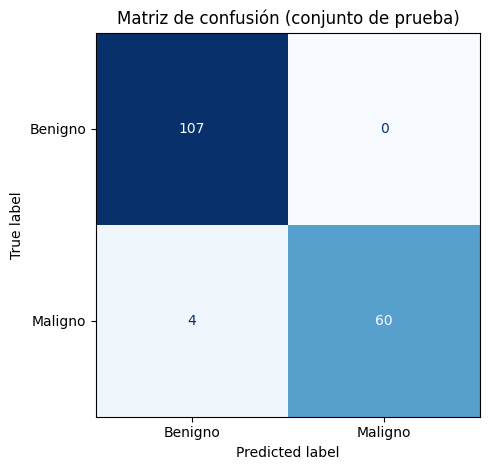

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print("\nReporte de clasificación (conjunto de prueba):\n")
print(classification_report(y_test, y_pred))  # 👈 CAMBIA AQUÍ y_test, y_pred

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Benigno', 'Maligno'],
    cmap='Blues',
    colorbar=False
)
plt.title("Matriz de confusión (conjunto de prueba)")
plt.grid(False)
plt.tight_layout()

### ✅ Recomendaciones finales y Reflexión 💬

La evaluación final nos dice que tenemos un posible problema cuando analizamos casos de tumor **maligno**, ya que lo puede predecir como benigno y creará un serio problema para el paciente.

El F1-score macro fue clave para evaluar el balance entre precisión y recall. También se observó buen desempeño en accuracy y recall, lo que indica una buena capacidad de generalización.

Dentro de las métricas llama la atención que el valor de recall para benigno sea de 1, por lo cual se lo puede tomar como un sobreajuste, pero la misma métrica para el caso de maligno también es cercana a 1 por lo que descartamos el sobreajuste lo cual lo comprobamos cuando corrimos varias arquitecturas de redes neuronales con el set de datos donde las métricas fueron menos favorables.

**Recomendaciones:**
* Para una próxima iteración, se debería obtener un set de datos más homógeneo donde la diferencia entre maligno y benigno no supere el 1%.
* Considerar la implementación early_stopping para evitar sobreentrenamiento cuando las arquitecturas a probar tiene más de dos capas y un número de neuronas superior a 50.
* En estos casos en la vida real se debe acompañar de la opinión de un experto, inclusive para saber si podemos descartar variables o atributos para entrenar al modelo.